In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

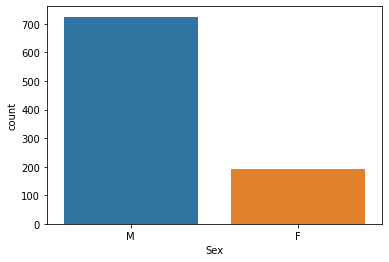

In [5]:
# plotting graph for output classes counts

plt.figure()
sns.countplot(x = 'Sex',data = df)

In [6]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

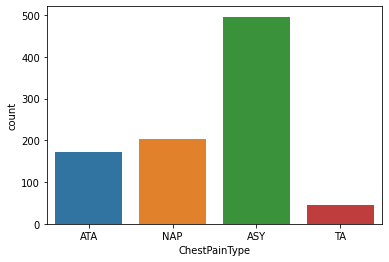

In [7]:
# plotting graph for output classes counts

plt.figure()
sns.countplot(x = 'ChestPainType',data = df)

In [8]:
df['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

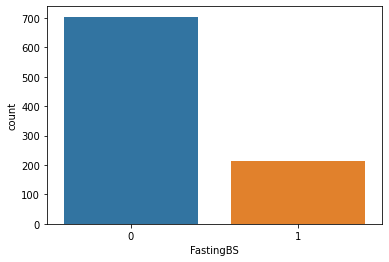

In [9]:
# plotting graph for output classes counts

plt.figure()
sns.countplot(x = 'FastingBS',data = df)

In [10]:
df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

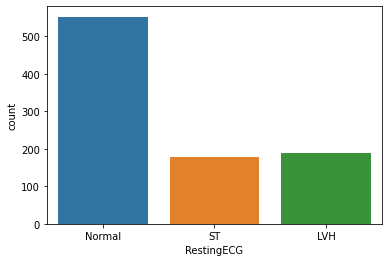

In [11]:
# plotting graph for output classes counts

plt.figure()
sns.countplot(x = 'RestingECG',data = df)

In [12]:
df['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

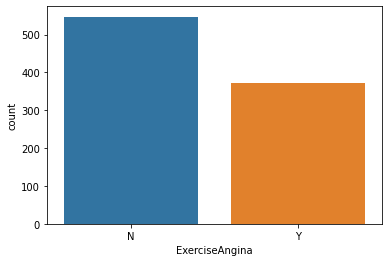

In [13]:
# plotting graph for output classes counts

plt.figure()
sns.countplot(x = 'ExerciseAngina',data = df)

In [14]:
df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

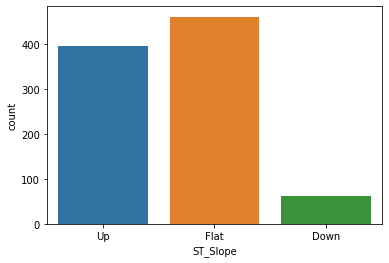

In [15]:
# plotting graph for output classes counts

plt.figure()
sns.countplot(x = 'ST_Slope',data = df)

In [16]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

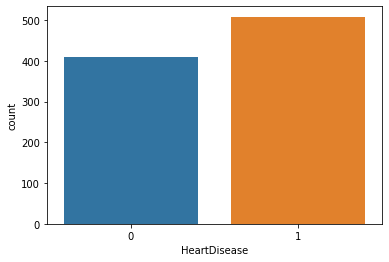

In [17]:
# plotting graph for output classes counts

plt.figure()
sns.countplot(x = 'HeartDisease',data = df)

In [18]:
df = pd.get_dummies(df, columns = ['ChestPainType', 'RestingECG'])
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,40,M,140,289,0,172,N,0.0,Up,0,0,1,0,0,0,1,0
1,49,F,160,180,0,156,N,1.0,Flat,1,0,0,1,0,0,1,0
2,37,M,130,283,0,98,N,0.0,Up,0,0,1,0,0,0,0,1
3,48,F,138,214,0,108,Y,1.5,Flat,1,1,0,0,0,0,1,0
4,54,M,150,195,0,122,N,0.0,Up,0,0,0,1,0,0,1,0


In [19]:
# Import label encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Sex','ExerciseAngina','ST_Slope'.
df['Sex']= label_encoder.fit_transform(df['Sex'])
df['ExerciseAngina']= label_encoder.fit_transform(df['ExerciseAngina'])
df['ST_Slope']= label_encoder.fit_transform(df['ST_Slope'])
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,40,1,140,289,0,172,0,0.0,2,0,0,1,0,0,0,1,0
1,49,0,160,180,0,156,0,1.0,1,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,2,0,0,1,0,0,0,0,1
3,48,0,138,214,0,108,1,1.5,1,1,1,0,0,0,0,1,0
4,54,1,150,195,0,122,0,0.0,2,0,0,0,1,0,0,1,0


In [20]:
# Printing list of the column
list(df.columns)

['Age',
 'Sex',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease',
 'ChestPainType_ASY',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'RestingECG_LVH',
 'RestingECG_Normal',
 'RestingECG_ST']

In [21]:
df = df[['Age','Sex','RestingBP','Cholesterol','FastingBS','MaxHR','ExerciseAngina','Oldpeak','ST_Slope',
        'ChestPainType_ASY','ChestPainType_ATA','ChestPainType_NAP','ChestPainType_TA','RestingECG_LVH',
        'RestingECG_Normal','RestingECG_ST','HeartDisease']]

In [22]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,HeartDisease
0,40,1,140,289,0,172,0,0.0,2,0,1,0,0,0,1,0,0
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,1
2,37,1,130,283,0,98,0,0.0,2,0,1,0,0,0,0,1,0
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,1
4,54,1,150,195,0,122,0,0.0,2,0,0,1,0,0,1,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f81f85a9730>,
      dtype=object)

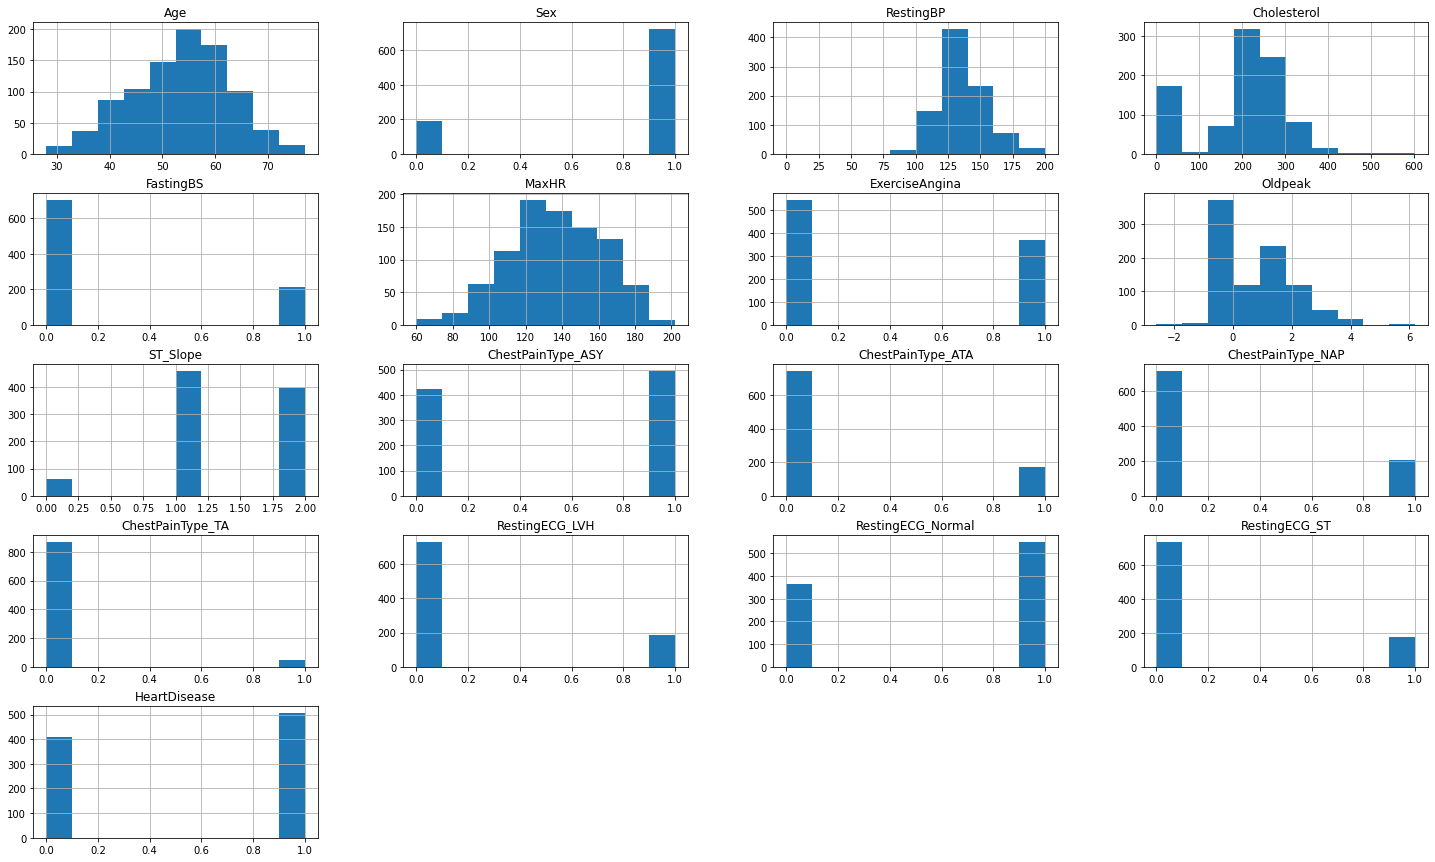

In [23]:
# plotting variation graphs for each property

df.hist(figsize = (25,15))

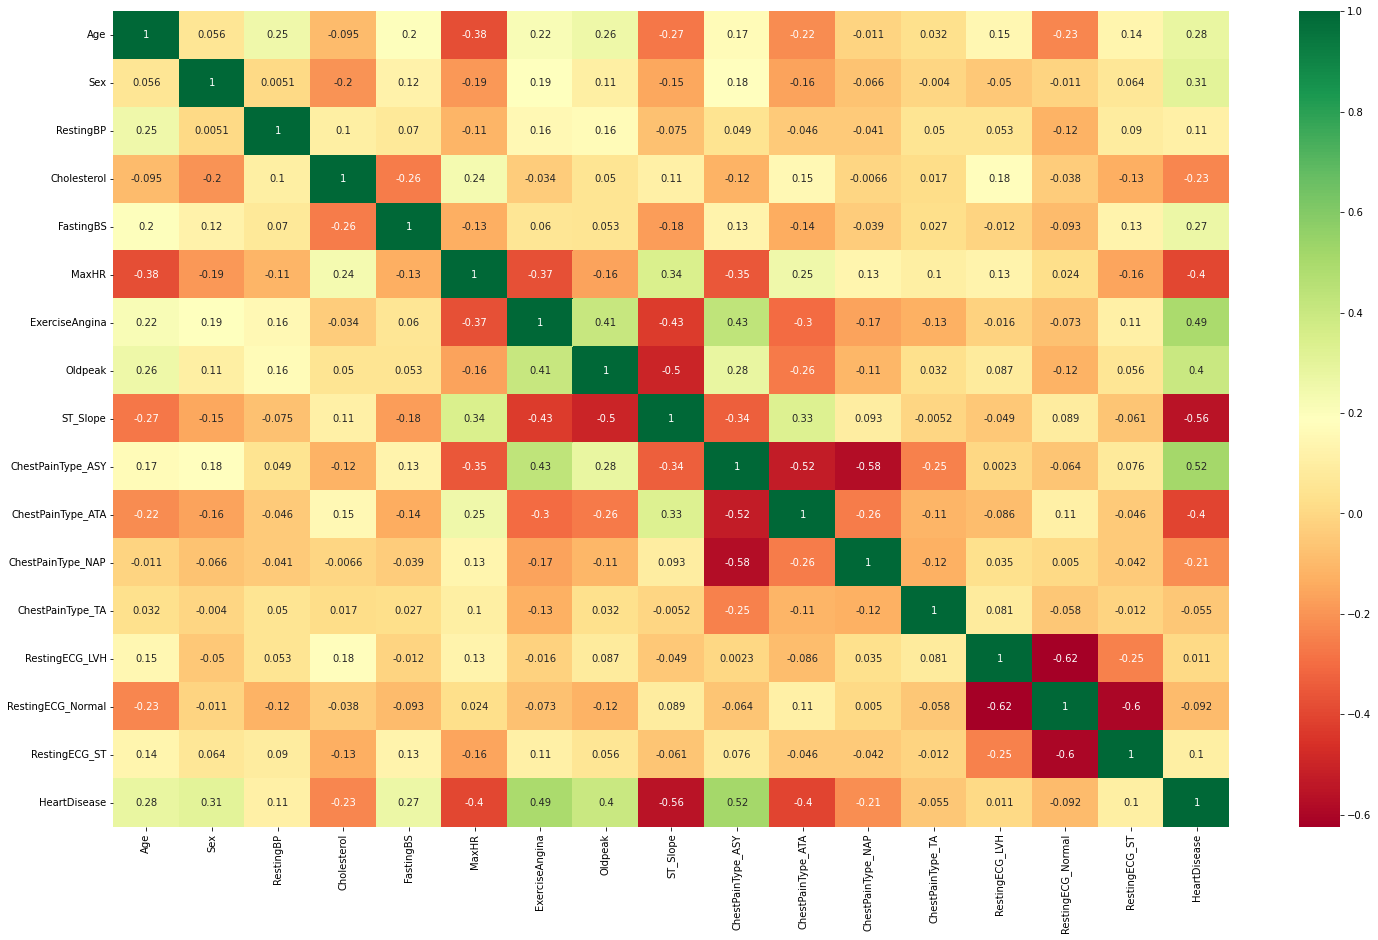

In [24]:
# Plotting the correlation heatmap
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,15))

g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [25]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [27]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [28]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.245067,0.540605,-0.708985,0.372803,1.842609,2.284353,-0.838461,-0.097061,-2.257465,-1.097362,-0.483336,1.879059,-0.213504,-0.504679,0.808179,-0.487621
1,-1.886236,0.540605,-0.166285,0.086146,-0.542709,1.652241,-0.838461,-0.836286,1.079855,-1.097362,-0.483336,1.879059,-0.213504,-0.504679,0.808179,-0.487621
2,0.250993,0.540605,0.919115,0.123134,1.842609,-0.441628,1.192662,0.087745,-0.588805,0.911276,-0.483336,-0.532181,-0.213504,-0.504679,0.808179,-0.487621
3,-1.779375,-1.849780,-0.166285,0.104640,-0.542709,0.229991,-0.838461,-0.836286,1.079855,-1.097362,-0.483336,1.879059,-0.213504,-0.504679,0.808179,-0.487621
4,-0.283314,0.540605,-0.708985,-1.846478,1.842609,-1.271274,-0.838461,-0.836286,-0.588805,0.911276,-0.483336,-0.532181,-0.213504,-0.504679,0.808179,-0.487621


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [30]:
# Predicting the Test set results
y_pred = logreg.predict(X_test)

In [31]:
# Making the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.82        77
           1       0.89      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



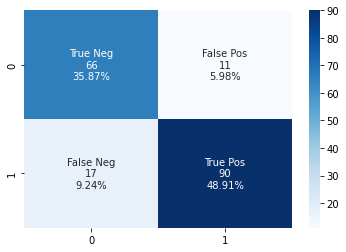

In [32]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [33]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [34]:
# Predicting the Test set results
y_pred = knn_classifier.predict(X_test)

In [35]:
# Making the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.95      0.76        77
           1       0.94      0.62      0.75       107

    accuracy                           0.76       184
   macro avg       0.79      0.78      0.76       184
weighted avg       0.82      0.76      0.75       184



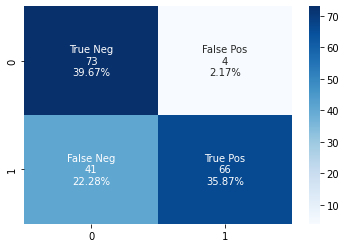

In [36]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier = rf_classifier.fit(X_train, y_train)

In [38]:
# Prediction
y_pred = rf_classifier.predict(X_test)

In [39]:
# Making the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87        77
           1       0.92      0.89      0.90       107

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



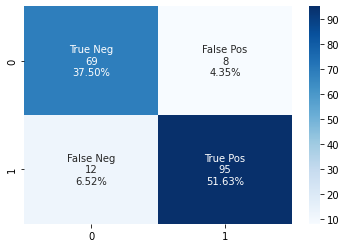

In [40]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [41]:
# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [42]:
# Predicting the Test set results
y_pred = nb_classifier.predict(X_test)

In [43]:
# Making the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        77
           1       0.90      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



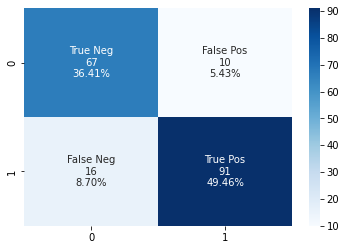

In [44]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [45]:
# Adding layers and activation function

import tensorflow as tf
ann=tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

#Compiling
ann.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [46]:
# Training the model

ann.fit(X_train,y_train,batch_size=32,epochs=1000)

Epoch 1/1000
23/23 [==============================] - 1s 2ms/step - loss: 0.7183 - accuracy: 0.5177
Epoch 2/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.6588 - accuracy: 0.6431
Epoch 3/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.6162 - accuracy: 0.7221
Epoch 4/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.5824 - accuracy: 0.7452
Epoch 5/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.5521 - accuracy: 0.7725
Epoch 6/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.5258 - accuracy: 0.7875
Epoch 7/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.5013 - accuracy: 0.7956
Epoch 8/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.4795 - accuracy: 0.8011
Epoch 9/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4613 - accuracy: 0.8093
Epoch 10/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.4455 - accuracy: 0.8120

In [47]:
# Prediction on Test data

y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

6/6 [==============================] - 0s 2ms/step


In [48]:
# Calculating quality for model

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy is: ' + str(accuracy_score(y_test, y_pred)))

[[67 10]
 [21 86]]
Accuracy is: 0.8315217391304348


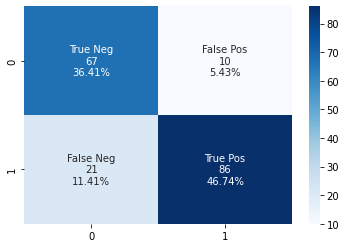

In [49]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [50]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)
 

Precision: 0.895833
Recall: 0.803738
F1 score: 0.847291


In [53]:
pred_prob1 = logreg.predict_proba(X_test)
pred_prob2 = knn_classifier.predict_proba(X_test)
pred_prob3 = rf_classifier.predict_proba(X_test)
pred_prob4 = nb_classifier.predict_proba(X_test)

In [54]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [55]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])

print(auc_score1, auc_score2, auc_score3, auc_score4)

0.9135817453574463 0.864182546425537 0.9407088238863939 0.9221992960310718


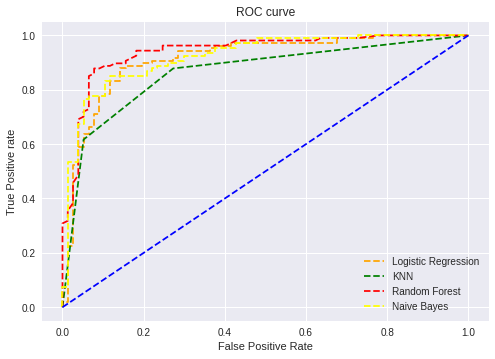

In [56]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Random Forest')
plt.plot(fpr4, tpr4, linestyle='--',color='yellow', label='Naive Bayes')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();